In [1]:
from hossam import load_data
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb
import numpy as np

In [10]:
my_dpi = 200
font_path = "./NotoSansKR-Regular.ttf"
fm.fontManager.addfont(font_path)
font_prop = fm.FontProperties(fname=font_path)
font_name = font_prop.get_name()
# my_font_name = "Noto Sans KR"

plt.rcParams['font.family'] = font_name
plt.rcParams['font.size'] = 6
plt.rcParams['axes.unicode_minus'] = False

In [4]:
origin = load_data('penguins')
origin

[data] https://data.hossam.kr/data/lab06/penguins.xlsx
[desc] 남극 팔머 군도의 펭귄 3종에 대해 신체 치수와 서식지 정보(출처: seaborn 내장 데이터)

field              description
-----------------  -------------
species            팽귄 종
island             서식지
bill_length_mm     부리 길이
bill_depth_mm      부리 두께
flipper_length_mm  날개 길이
body_mass_g        몸무게
sex                성별



,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,MALE
1,Adelie,Torgersen,39.5,17.4,186,3800,FEMALE
2,Adelie,Torgersen,40.3,18.0,195,3250,FEMALE
3,Adelie,Torgersen,36.7,19.3,193,3450,FEMALE
4,Adelie,Torgersen,39.3,20.6,190,3650,MALE
...,...,...,...,...,...,...,...
329,Gentoo,Biscoe,47.2,13.7,214,4925,FEMALE
330,Gentoo,Biscoe,46.8,14.3,215,4850,FEMALE
331,Gentoo,Biscoe,50.4,15.7,222,5750,MALE
332,Gentoo,Biscoe,45.2,14.8,212,5200,FEMALE


barplot
- 집단별 평균/합계/비율 등 요약 통계 시각화의 기본형
- estimator 파라미터로 평균(mean) 외에도 median, sum 등 자유롭게 설정 가능
- 범주형 분석에서 가장 표준적으로 쓰이는 그래프

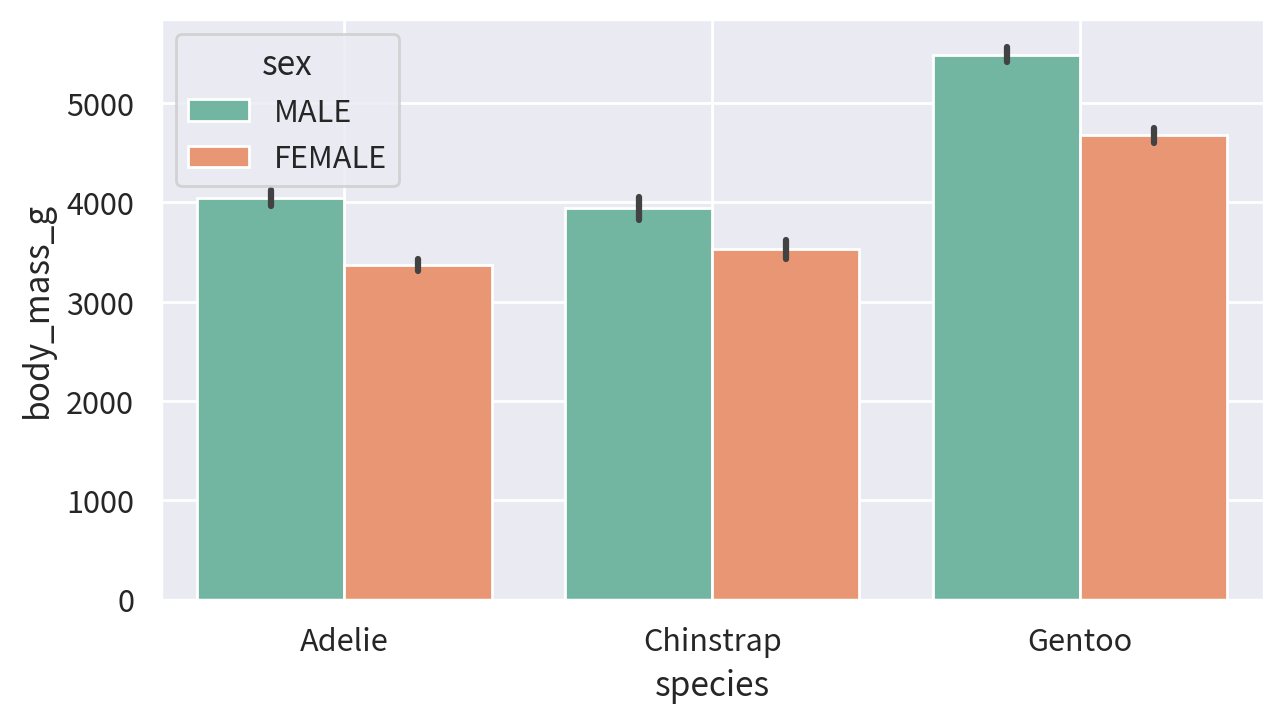

In [11]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 1280             #그래프 가로 크기
height_px = 720             #그래프 세로 크기
rows = 1                    #도화지의 행 수
cols = 1                    #도화지의 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 2) barplot 그리기
sb.barplot(
    data=origin,
    x="species",
    y="body_mass_g",
    hue="sex",
    estimator=np.mean,
    errorbar=("ci", 95),
    palette="Set2"
)

# 3) 그래프 꾸미기 -> 도화지(ax)에 직접 적용
ax.grid(True)

# 4) 출력
plt.tight_layout()                      #여백 제거
# plt.savefig("myplot.png", dpi=my_dpi)   #생략 가능
plt.show()                              #그래프 화면 출력
plt.close()                             #그래프 작업 종료

countplot(빈도 그래프)
- 범주형 빈도(Count)를 바로 보여주는 가장 단순하고 직관적인 요약 그래프
- 기술통계 보고서, EDA에서 거의 항상 등장

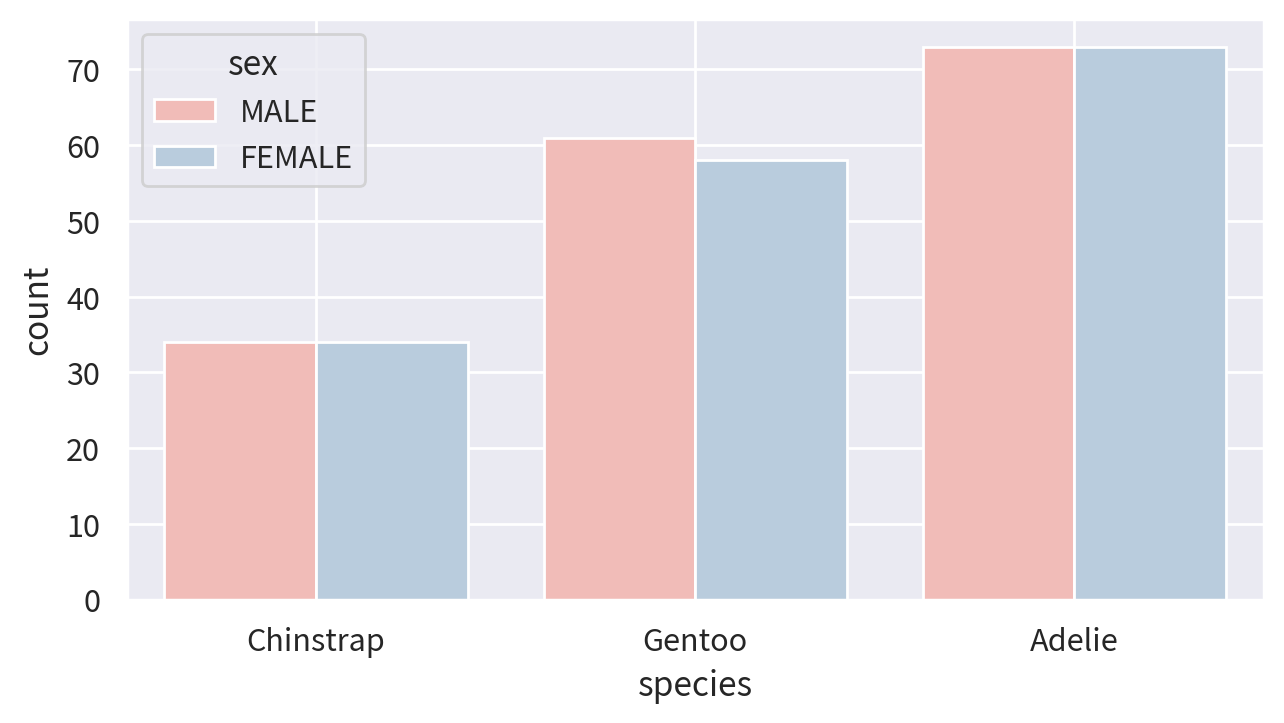

In [12]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 1280             #그래프 가로 크기
height_px = 720             #그래프 세로 크기
rows = 1                    #도화지의 행 수
cols = 1                    #도화지의 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 2) barplot 그리기
sb.countplot(
    data=origin,
    x="species",
    hue="sex",
    order=['Chinstrap', 'Gentoo', 'Adelie'],
    palette="Pastel1"
)

# 3) 그래프 꾸미기 -> 도화지(ax)에 직접 적용
ax.grid(True)

# 4) 출력
plt.tight_layout()                      #여백 제거
# plt.savefig("myplot.png", dpi=my_dpi)   #생략 가능
plt.show()                              #그래프 화면 출력
plt.close()                             #그래프 작업 종료

pointplot
- 점+오차막대 형태의 집단별 평균+`신뢰구간`요약
- 여러 그룹(hue) 비교 시 가장 깔끔하고 해석성이 높음
- 회귀 분석 전 EDA에서 추세 파악용으로 인기

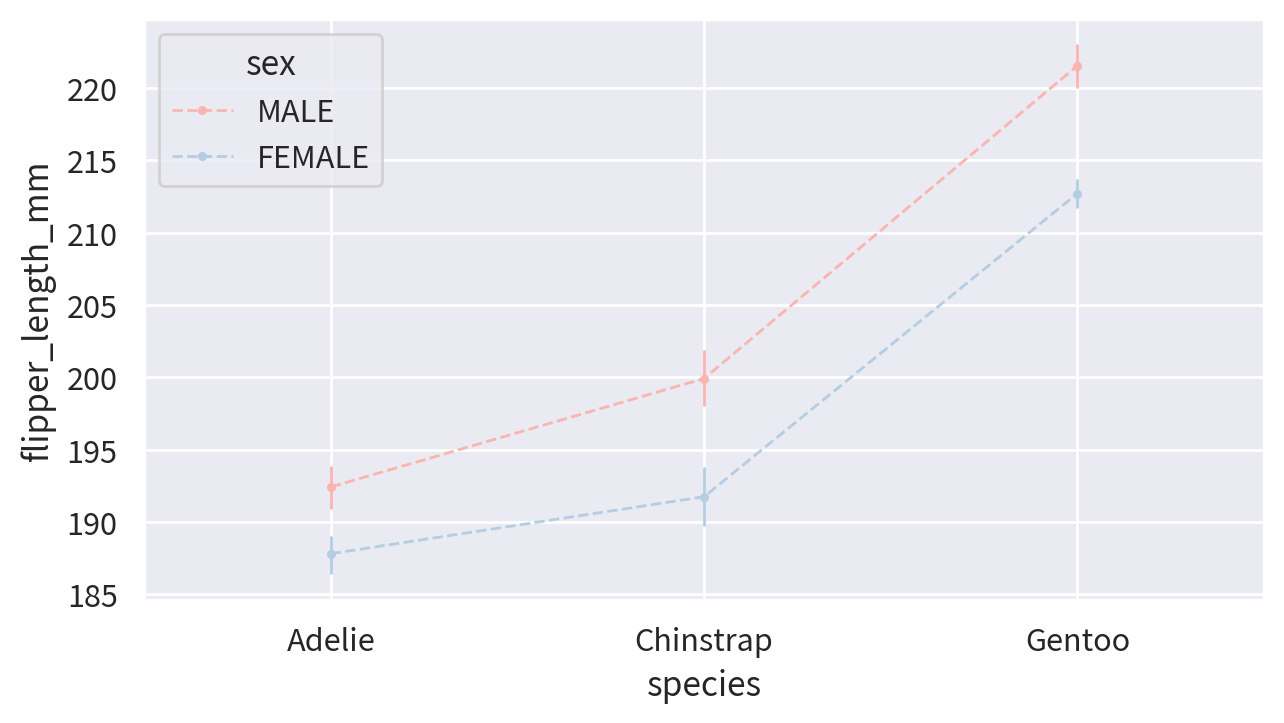

In [13]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 1280             #그래프 가로 크기
height_px = 720             #그래프 세로 크기
rows = 1                    #도화지의 행 수
cols = 1                    #도화지의 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 2) barplot 그리기
sb.pointplot(
    data=origin,
    x="species",
    y="flipper_length_mm",
    hue="sex",
    estimator=np.mean,
    errorbar=("ci", 95),
    linestyle='--',
    linewidth=1,
    markers='o',
    palette="Pastel1"
)

# 3) 그래프 꾸미기 -> 도화지(ax)에 직접 적용
ax.grid(True)

# 4) 출력
plt.tight_layout()                      #여백 제거
# plt.savefig("myplot.png", dpi=my_dpi)   #생략 가능
plt.show()                              #그래프 화면 출력
plt.close()                             #그래프 작업 종료